In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
users_df = pd.read_csv('model_data/auxiliary/users.csv')

users_df.head()

,Unnamed: 0,id,username,gender,primary_color,age_group,energy_level,attention_need,personality,is_first_cat,...,age_kitten,age_juvenile,age_senior,primary_color_no_preference,primary_color_calico_tortie,primary_color_ginger,primary_color_others,primary_color_tabby,primary_color_white,primary_color_black
0,0,8b1aa3c3-162f-4717-a9f5-d895ec52f2a4,Chai Chai,no preference,['no preference'],['no preference'],no preference,no preference,anything is nice,True,...,False,False,False,True,False,False,False,False,False,False
1,1,c0d37cae-c1fc-4aca-9135-0e1d4f222a99,Raiken01,no preference,['no preference'],['no preference'],chill,independent,anything is nice,True,...,False,False,False,True,False,False,False,False,False,False
2,2,4e663992-2176-4a8f-a879-b802ef8d88bb,JeanneTan,no preference,['no preference'],['adult'],chill,no preference,some spice,True,...,False,False,False,True,False,False,False,False,False,False
3,3,e3d44c57-27ef-4c7c-8746-19af91f88b8c,Gg.com.sg,no preference,['no preference'],"['kitten', 'juvenile']",chill,independent,all sweet,True,...,True,True,False,True,False,False,False,False,False,False
4,4,9340ece1-13e0-4926-8eaf-47c01b053cc3,Michiematch,no preference,['no preference'],"['juvenile', 'adult']",chill,an attention seeker,all sweet,True,...,False,True,False,True,False,False,False,False,False,False


In [3]:
users_df.drop(users_df.columns[users_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


id_list = users_df['id'].tolist()

users_df.head()


,id,username,gender,primary_color,age_group,energy_level,attention_need,personality,is_first_cat,has_other_cats,...,age_kitten,age_juvenile,age_senior,primary_color_no_preference,primary_color_calico_tortie,primary_color_ginger,primary_color_others,primary_color_tabby,primary_color_white,primary_color_black
0,8b1aa3c3-162f-4717-a9f5-d895ec52f2a4,Chai Chai,no preference,['no preference'],['no preference'],no preference,no preference,anything is nice,True,False,...,False,False,False,True,False,False,False,False,False,False
1,c0d37cae-c1fc-4aca-9135-0e1d4f222a99,Raiken01,no preference,['no preference'],['no preference'],chill,independent,anything is nice,True,False,...,False,False,False,True,False,False,False,False,False,False
2,4e663992-2176-4a8f-a879-b802ef8d88bb,JeanneTan,no preference,['no preference'],['adult'],chill,no preference,some spice,True,True,...,False,False,False,True,False,False,False,False,False,False
3,e3d44c57-27ef-4c7c-8746-19af91f88b8c,Gg.com.sg,no preference,['no preference'],"['kitten', 'juvenile']",chill,independent,all sweet,True,False,...,True,True,False,True,False,False,False,False,False,False
4,9340ece1-13e0-4926-8eaf-47c01b053cc3,Michiematch,no preference,['no preference'],"['juvenile', 'adult']",chill,an attention seeker,all sweet,True,False,...,False,True,False,True,False,False,False,False,False,False


In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           70 non-null     object
 1   username                     70 non-null     object
 2   gender                       70 non-null     object
 3   primary_color                70 non-null     object
 4   age_group                    70 non-null     object
 5   energy_level                 70 non-null     object
 6   attention_need               70 non-null     object
 7   personality                  70 non-null     object
 8   is_first_cat                 70 non-null     bool  
 9   has_other_cats               70 non-null     bool  
 10  good_with_other_dogs         70 non-null     bool  
 11  good_with_kids               70 non-null     bool  
 12  employment                   70 non-null     object
 13  home_ownership               70 non-n

In [5]:
try:
    users_df.drop(['id', 'username', 'gender', 'primary_color', 'age_group', 'created_at', 'updated_at'], axis=1, inplace=True)

except Exception as e:
    print(e)

users_df.head()

,energy_level,attention_need,personality,is_first_cat,has_other_cats,good_with_other_dogs,good_with_kids,employment,home_ownership,has_allergies,...,age_kitten,age_juvenile,age_senior,primary_color_no_preference,primary_color_calico_tortie,primary_color_ginger,primary_color_others,primary_color_tabby,primary_color_white,primary_color_black
0,no preference,no preference,anything is nice,True,False,True,True,working full time,self-owned,False,...,False,False,False,True,False,False,False,False,False,False
1,chill,independent,anything is nice,True,False,False,False,working full time,staying with parents,False,...,False,False,False,True,False,False,False,False,False,False
2,chill,no preference,some spice,True,True,False,False,working full time,self-owned,False,...,False,False,False,True,False,False,False,False,False,False
3,chill,independent,all sweet,True,False,False,True,student,staying with parents,False,...,True,True,False,True,False,False,False,False,False,False
4,chill,an attention seeker,all sweet,True,False,False,True,working full time,self-owned,False,...,False,True,False,True,False,False,False,False,False,False


In [6]:
# one-hot encoding (NVM ruoxi did this part)
try:
    categorical_columns = ['energy_level', 'attention_need', 'personality', 'employment', 'home_ownership']
    users_df = pd.get_dummies(users_df, columns=categorical_columns)

except Exception as e:
    print(e)

# users_df.drop('age_group', 1).join(users_df.age_group.str.join('|').str.get_dummies())

users_df = users_df*1

users_df.head()
# 

,is_first_cat,has_other_cats,good_with_other_dogs,good_with_kids,has_allergies,agree_to_fee,age_no_preference,age_adult,age_kitten,age_juvenile,...,personality_all sweet,personality_anything is nice,personality_some spice,employment_not working,employment_student,employment_working full time,employment_working part time,home_ownership_rented with landlord consent,home_ownership_self-owned,home_ownership_staying with parents
0,1,0,1,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,1,0,0,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
4,1,0,0,1,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


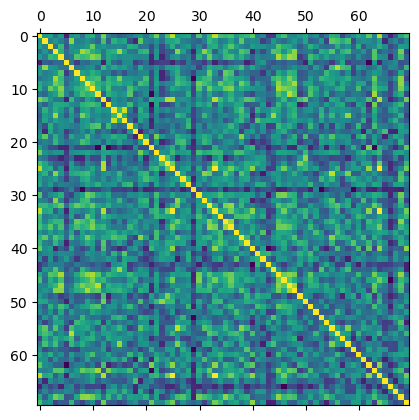

The person that is most similar to this cold start chap is of index 17 and ID of 9af16262-416a-466a-973d-4d54ea0c2172 with a similarity score of 0.6735753140545635


In [8]:
cosine_sim_mat = cosine_similarity(users_df)

import matplotlib.pyplot as plt

plt.matshow(cosine_sim_mat)
plt.show()

USER_IDX = 28

user_similarity_list = cosine_sim_mat[USER_IDX]
user_similarity_tuplelist = []

for idx, cosSim in enumerate(user_similarity_list):
    user_similarity_tuplelist.append((idx, cosSim))

user_similarity_tuplelist.sort(key=lambda x:x[1], reverse=True)
# print(user_similarity_tuplelist)

# choose person most similar to selected User
most_similar_idx = user_similarity_tuplelist[1][0]
most_similar_score = user_similarity_tuplelist[1][1]
most_similar_id = id_list[most_similar_idx]

print(f"The person that is most similar to this cold start chap is of index {most_similar_idx} and ID of {most_similar_id} with a similarity score of {most_similar_score}")